In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

import pkg_cc_analysis as cca
import pkg_txt_analysis as txa

%load_ext autoreload
%autoreload 2

In [ ]:
txa.combine_two_part_ep('C1', ['035', '033', '031'])
cca.combine_two_part_ep('C1', ['035', '033', '031'])

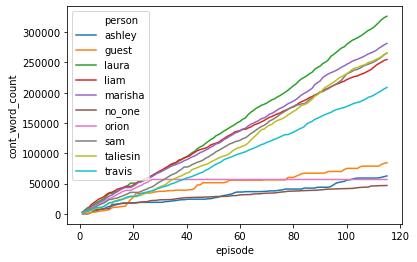

In [5]:
test_df = txa.episode_extract('C1', 1, 115)
extract_names = txa.mapping_names(test_df)
org_names_df = txa.combine_name_list(extract_names)
person_episode_group = txa.group_by_person_episode(org_names_df)
count_per_ep = txa.count_per_episode(person_episode_group)

count_per_ep['episode'] = count_per_ep['episode'].astype('int')
no_matt = count_per_ep.loc[count_per_ep['person'] != 'matt']
sns.lineplot(x="episode", y="cont_word_count", data=no_matt, hue='person')

In [ ]:
total_names = sum(person_episode_group['word_count'])
no_one_count = person_episode_group.loc[['no_one']]
no_one_count = sum(no_one_count['word_count'])
print ((total_names - no_one_count)/total_names)

In [76]:
processed_srt_df = cca.episode_extract(1,115)
processed_srt_df.to_csv('data_output/_processed_srt_df.csv')

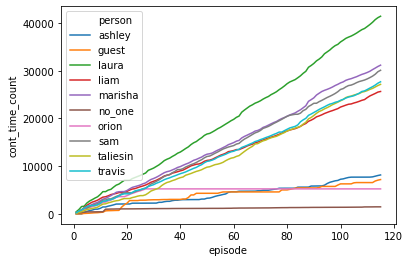

In [74]:
extract_names = cca.mapping_names(processed_srt_df)
org_names_df = cca.combine_name_list(extract_names)
person_episode_group = cca.group_by_person_episode(org_names_df)
count_per_ep = cca.count_per_episode(person_episode_group)

count_per_ep['episode'] = count_per_ep['episode'].astype('int')
no_matt = count_per_ep.loc[count_per_ep['person'] != 'matt']
sns.lineplot(x="episode", y="cont_time_count", data=no_matt, hue='person')